<a href="https://colab.research.google.com/github/IEwaspbusters/KopuruVespaCompetitionIE/blob/main/Competition_subs/2021-04-28_submit/batch_LARVAE/HEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Base packages -----------------------------------
import pandas as pd
import numpy as np

# Data Viz -----------------------------------
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10) # to set figure size when ploting feature_importance


# XGBoost -------------------------------
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance # built-in function to plot features ordered by their importance

# SKLearn -----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn import preprocessing # scaling data

In [51]:
# Importing datasets from GitHub as Pandas Dataframes
queen_train = pd.read_csv("./WBds03_QUEENtrain.csv") #2018+2019 test df
queen_predict = pd.read_csv("./WBds03_QUEENpredict.csv") #2020 prediction df

In [52]:
# selecting the train X & y variables

# Y will be the response variable (filter for the number of wasp nests - waspbust_id)  
y = queen_train.waspbust_id

# X will be the explanatory variables. Remove response variable and non desired categorical columns such as (municip code, year, etc...)
X = queen_train.iloc[:,6:].drop(["waspbust_id","station_code","MMM","station_name","index"],axis=1)

# We want to predict our response variable (number of nests in 2020). Remove response variable and non desired categorical columns such as (municip code, year, etc...)
queen_predict2020 = queen_predict.iloc[:,5:].drop(["station_code","MMM","station_name","index"],axis=1)

In [53]:
# Scale the datasets using MinMaxScaler

X_scaled = preprocessing.minmax_scale(X) # this creates a numpy array
X_scaled = pd.DataFrame(X_scaled,index=X.index,columns=X.columns) # create a Pandas Dataframe == X

In [54]:
# selecting the XGBoost model and fitting with the train data
model = XGBRegressor()
model.fit(X_scaled, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

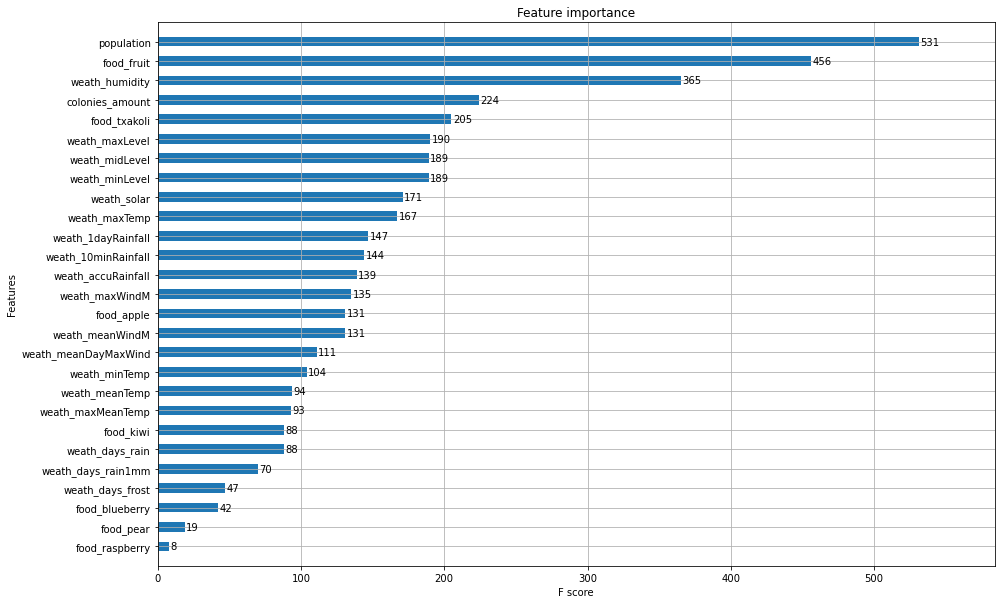

In [55]:
# plot feature importance to select relevant variables

plot_importance(model,height=0.5)
plt.show()

In [56]:
# selecting the XGBoost model and fitting with the train data without the irrelevant variables
# selecting the train X & y variables

# Y will be the response variable (filter for the number of wasp nests - waspbust_id)  
y = queen_train.waspbust_id

# X will be the explanatory variables. Remove response variable and non desired categorical columns such as (municip code, year, etc...)
X = queen_train.iloc[:,6:].loc[:,["population","food_fruit","colonies_amount","weath_humidity"]]

# We want to predict our response variable (number of nests in 2020). Remove response variable and non desired categorical columns such as (municip code, year, etc...)
queen_predict2020 = queen_predict.loc[:,["population","food_fruit","colonies_amount","weath_humidity"]]

In [57]:
# refitting the model

model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
# make a prediction

prediction_2020 = model.predict(queen_predict2020)

In [61]:
queen_predict["nests_2020"] = prediction_2020

In [72]:
# group by municip code
group_predict = queen_predict.groupby(by=["municip_code","municip_name"], as_index=False).sum()

In [73]:
HEX = group_predict.loc[:,["municip_code","municip_name","nests_2020"]].round() # create a new Dataframe for Kopuru submission
HEX.columns = ["CODIGO MUNICIPIO","NOMBRE MUNICIPIO","NIDOS 2020"] # change column names to Spanish (Decidata template)
HEX = HEX.append({"CODIGO MUNICIPIO":48020,"NOMBRE MUNICIPIO":"Bilbao", "NIDOS 2020":0}, ignore_index=True) # add row for Bilbao

In [71]:
# Number of Nests
HEX.iloc[:,2].sum()

3585.0

In [ ]:
# Save the new dataFrame as a .csv in the current working directory on Windows

HEX.to_csv("WaspBusters_20210512_batch_XGmonths.csv", index=False)